# Лабораторная работа "Системы ОДУ"

In [1]:
from solvers import RungeKuttaCollection, AdamsCollection, BDFCollection, CALC_TYPE
import matplotlib.pyplot as plt
import numpy as np

> **ДИСКЛЕЙМЕР:** Реализации методов лежат в файле ```solvers.py```

## 0. Задача

Вариант 2, задача VIII.11.2: Уравнение Ван-дер-Поля
$$\begin{cases} y'' + \mu (y^2 - 1)y' + y = 0,~\mu>0 \\ y(0) = 2 \\ y'(0) = 0 \end{cases}$$

Сделаем замену $u = y, ~v=y'$, получим систему
$$ \begin{cases} u' = v \\ v' = \mu (1 - u^2) v - u \\ u(0) = 2 \\ v(0) = 0\end{cases} $$

Будем изучать поведение системы при варьировании параметра $\mu$. Интервал времени выберем $t: 0 < t < 100$.

> Шаг сетки $h$, а также интервал отрисовки графика $y(t)$ будут выбираться таким образом, чтобы продемонстрировать улучшение аппроксимации при увеличении порядка метода.

In [2]:
def task(mu, h, solvers, labels, title, tbounds=(80,100)):
    tmin, tmax = tbounds

    def func(y, t):
        u, v = y
        f0 = v
        f1 = mu*(1 - u**2)*v - u
        return np.array([f0, f1])

    u0 = 2
    v0 = 0
    t0 = 0

    for solver in solvers:
        solver.init_problem(func, t0, np.array([u0, v0]))

    fig, (intc, phsp) = plt.subplots(1, 2)
    fig.set_size_inches(12, 6)

    intc.set_xlabel("$t$")
    intc.set_ylabel("$y$")
    intc.set_title("$Integral ~curve$")
    intc.grid()
    intc.set_xlim([tmin, tmax])

    phsp.set_xlabel("$y$")
    phsp.set_ylabel("$y'$")
    phsp.set_title("$Phase ~portrait$")
    phsp.grid()

    for i, (solver, label) in enumerate(zip(solvers, labels)):
        nsteps = np.ceil((tmax - t0) / solver.get_h()).astype(np.uint64)

        T = []
        Y = []
        Yd = []

        for _ in range(nsteps):
            t, y = solver.step()
            T.append(t)
            Y.append(y[0])
            Yd.append(y[1])

        if i + 1 == len(solvers):
            intc.plot(T, Y, "k--", label=label)
            phsp.plot(Y, Yd, "k--", linewidth=.5)
        else:
            intc.plot(T, Y, label=label)
            phsp.plot(Y, Yd, linewidth=.5)
        
    fig.legend()
    plt.suptitle(f"$Van-der-poll, \mu={mu}$\n${title}, h={h}$")
    plt.show()

### Валидация

Проверять работоспособность будем на более простой задаче

$$\begin{cases} y'' + y = 0.2*cos(t) \\ y(0) = 1 \\ y'(0) = 0 \end{cases}$$

Аналитическое решение: $y = cos(t) + 0.1tsin(t)$

In [3]:
# Solving
#   y'' + y = 0.2*cost
#   y(0) = 1, y'(0) = 0
# Solution
#   y = cost + 0.1*tsint
def validate(solvers, labels, steps, bound, title):
    def test_f(y, t):
        u, v = y
        f0 = v
        f1 = -u + 0.2 * np.cos(t)
        return np.array([f0, f1]).astype(CALC_TYPE)

    for solver in solvers:
        solver.init_problem(test_f, 0, np.array([1, 0]))

    T_real = np.linspace(0, bound, 1000)
    Y_real = 0.1*T_real * np.sin(T_real) + np.cos(T_real)

    plt.plot(T_real, Y_real, "k--", label="$Analytical$")

    for solver, label in zip(solvers, labels):
        T = []
        Y = []
        for _ in range(steps):
            t, y = solver.step()
            T.append(t)
            Y.append(y[0])
        plt.plot(T, Y, label=label, linestyle="-", marker="")
        
    plt.legend()
    plt.grid()
    plt.title(f"$Method~ validation: ~{title}$")
    plt.xlabel("t")
    plt.ylabel("y")
    plt.show()

## 1. Явные методы Рунге-Кутты

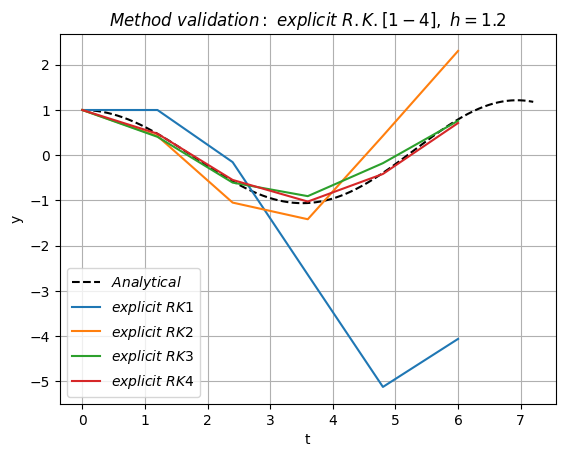

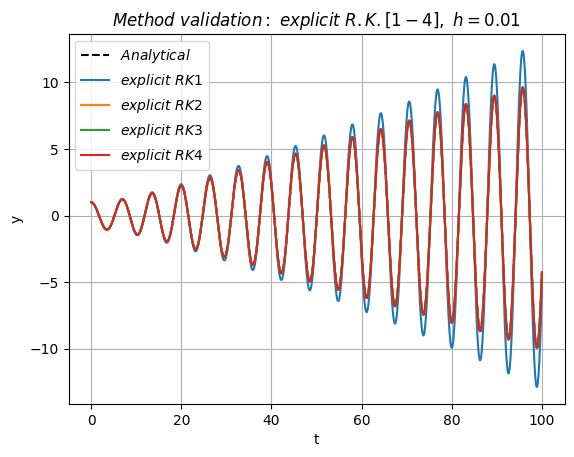

In [4]:
def validate_rk(steps, h):
    solvers = [RungeKuttaCollection.create_e1(h),
               RungeKuttaCollection.create_e2(h),
               RungeKuttaCollection.create_e3(h),
               RungeKuttaCollection.create_e4(h)]

    labels = ["$explicit~ RK1$", "$explicit~ RK2$", "$explicit~ RK3$", "$explicit~ RK4$"]

    validate(solvers, labels, steps, steps*h, f"explicit~ R.K. [1-4],~h={h}")

# Disclaimer:
# I've intentionnaly chosen really big "h"
# To see how method order improves approximation 
validate_rk(6, 1.2)

validate_rk(10000, 1e-2)

### Решение

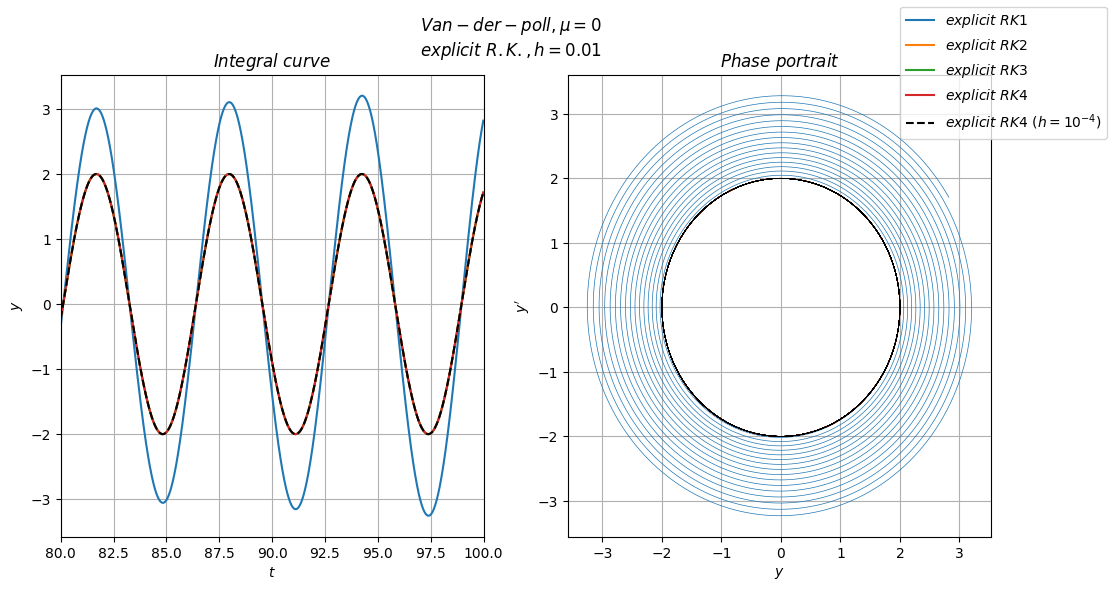

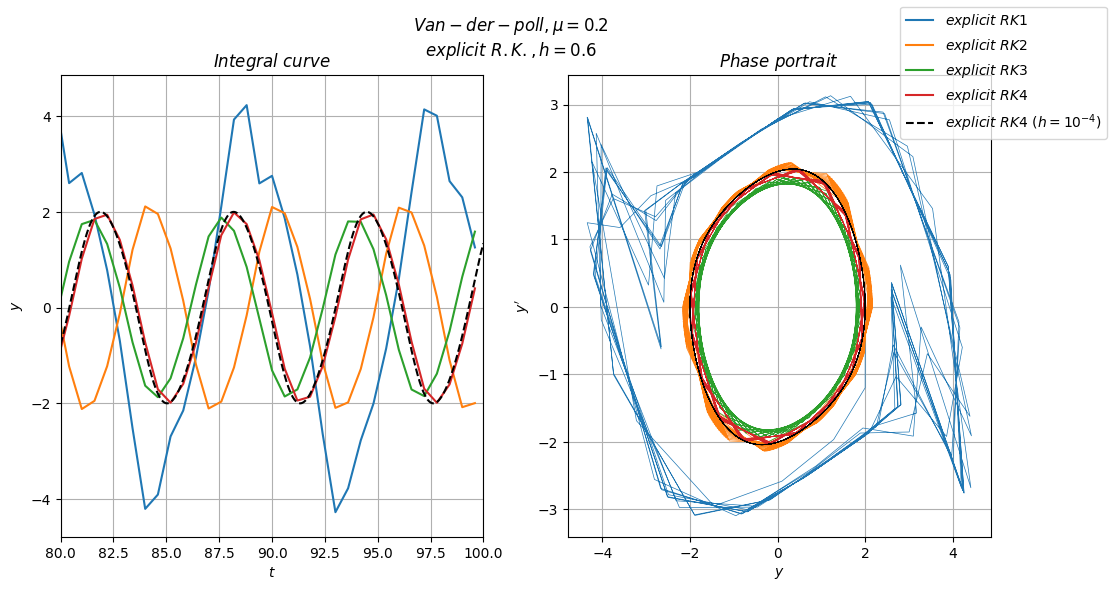

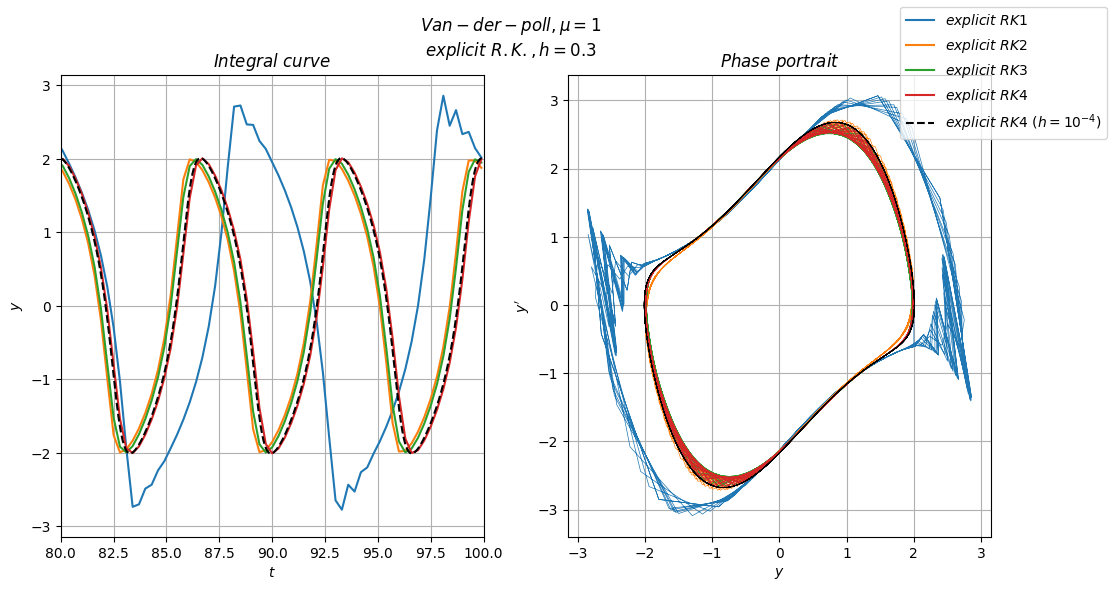

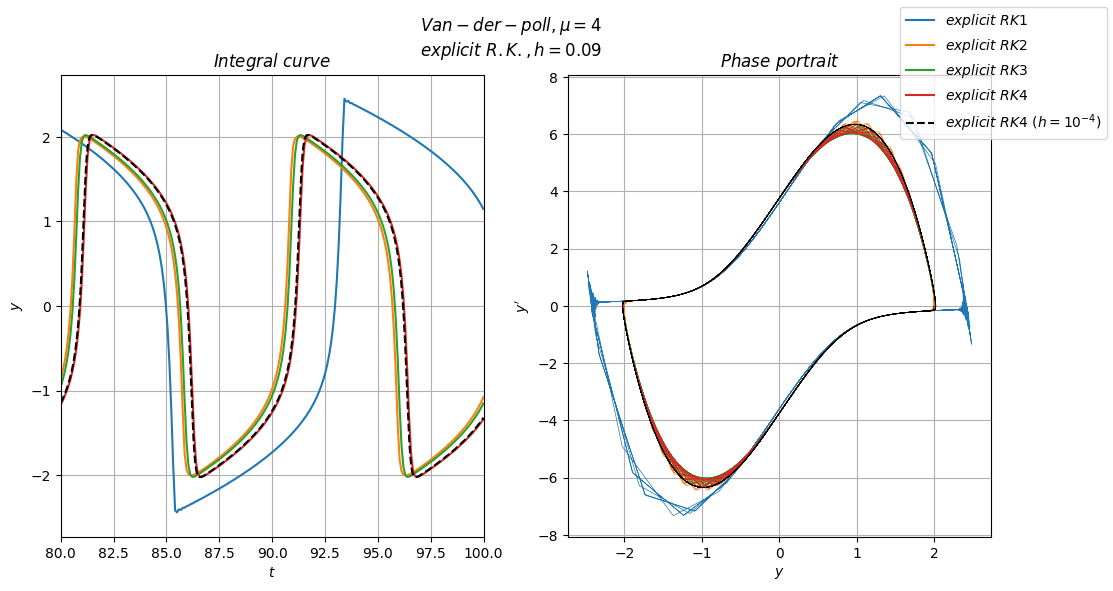

In [ ]:
def solution_rk(mu, h):
    solvers = [RungeKuttaCollection.create_e1(h),
               RungeKuttaCollection.create_e2(h),
               RungeKuttaCollection.create_e3(h),
               RungeKuttaCollection.create_e4(h),
               RungeKuttaCollection.create_e4(1e-3)]

    labels = ["$explicit~ RK1$", "$explicit~ RK2$", "$explicit~ RK3$", "$explicit~ RK4$", "$explicit~ RK4 ~(h=10^{-4})$"]

    task(mu, h, solvers, labels, "explicit~ R.K.")

solution_rk(0, 1e-2)
solution_rk(0.2, 6e-1)
solution_rk(1, 3e-1)
solution_rk(4, 9e-2)

## 2. Явные методы Адамса

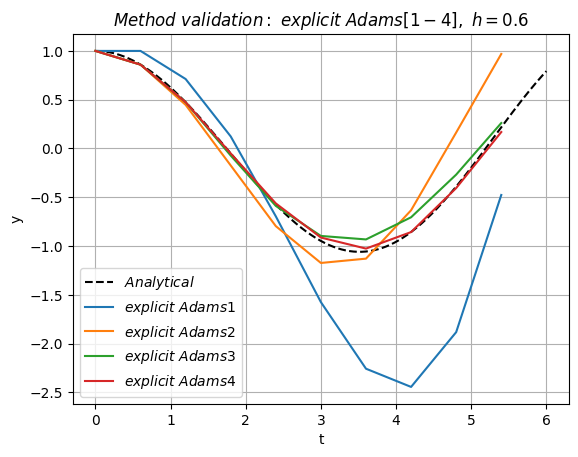

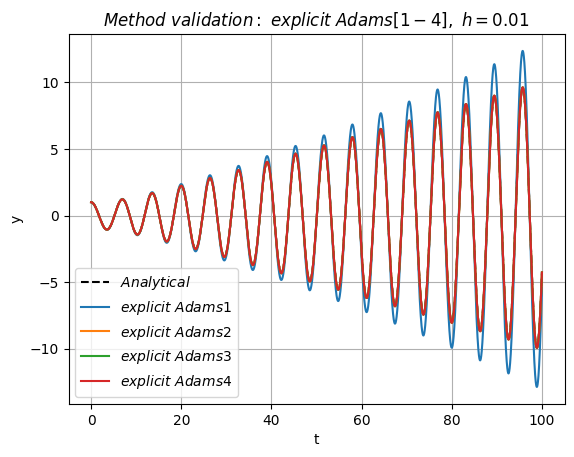

In [6]:
def validate_adams(steps, h):
    solvers = [AdamsCollection.create_e1(h),
               AdamsCollection.create_e2(h),
               AdamsCollection.create_e3(h),
               AdamsCollection.create_e4(h)]
    
               
    labels = ["$explicit~ Adams1$", "$explicit~ Adams2$", "$explicit~ Adams3$", "$explicit~ Adams4$"]

    validate(solvers, labels, steps, steps*h, f"explicit~ Adams [1-4],~h={h}")

validate_adams(10, 6e-1)
validate_adams(10000, 1e-2)

### Решение

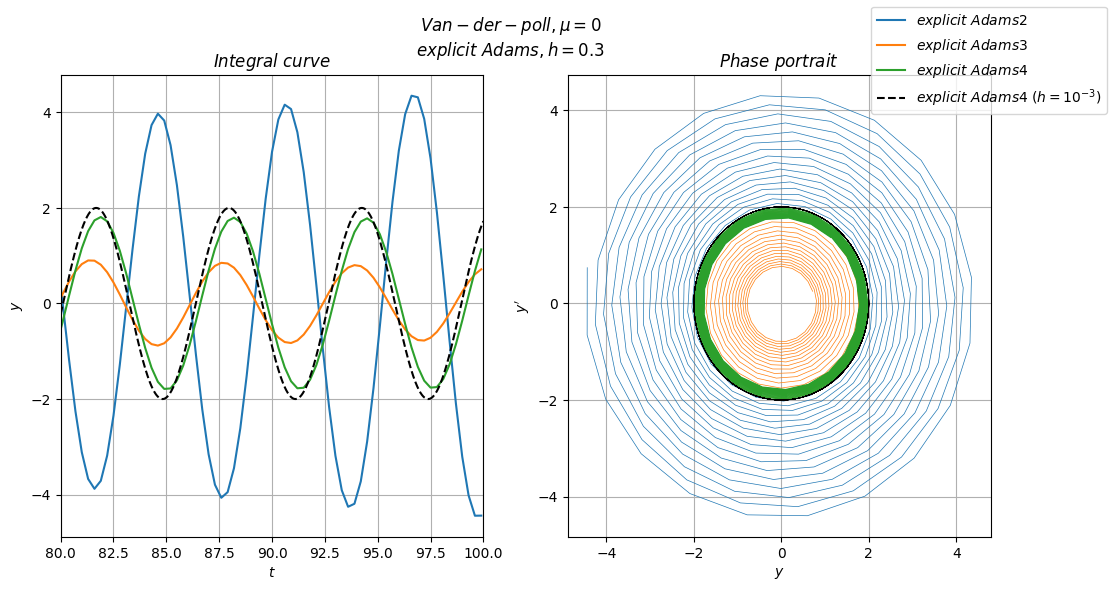

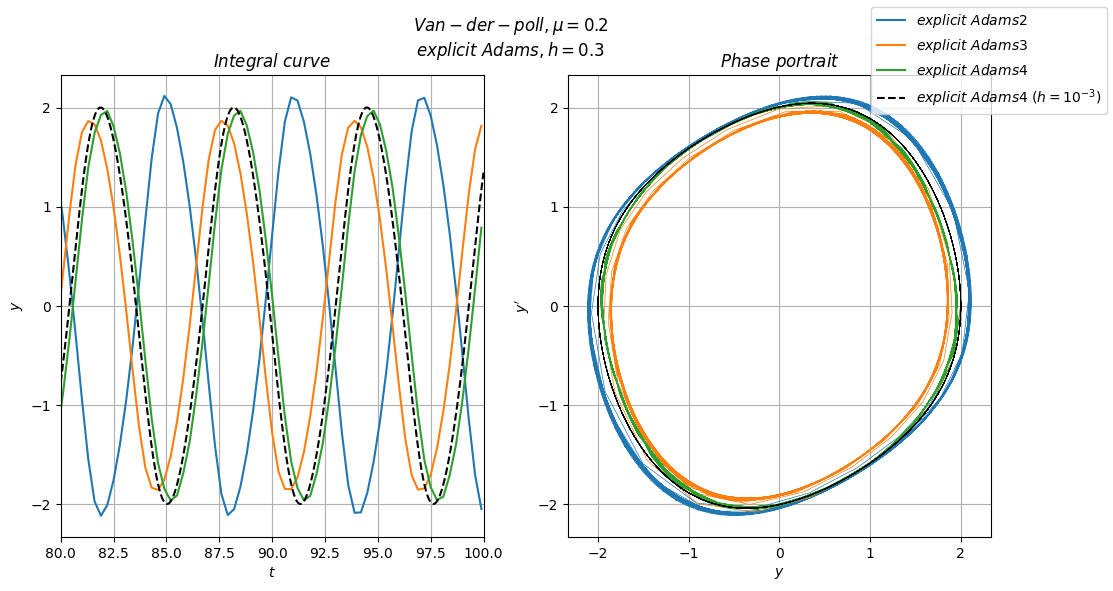

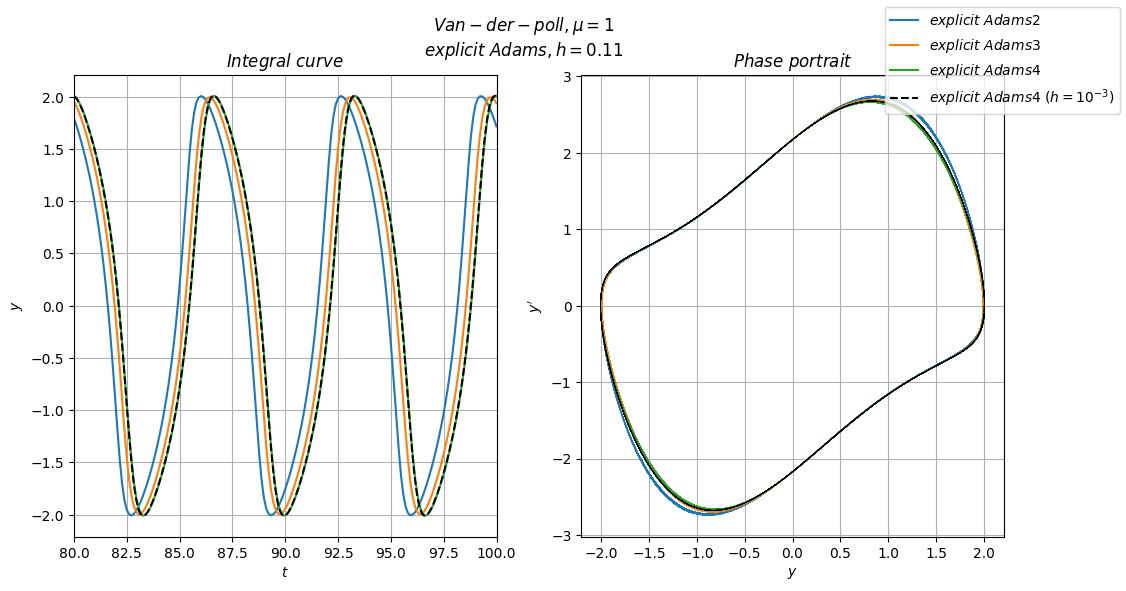

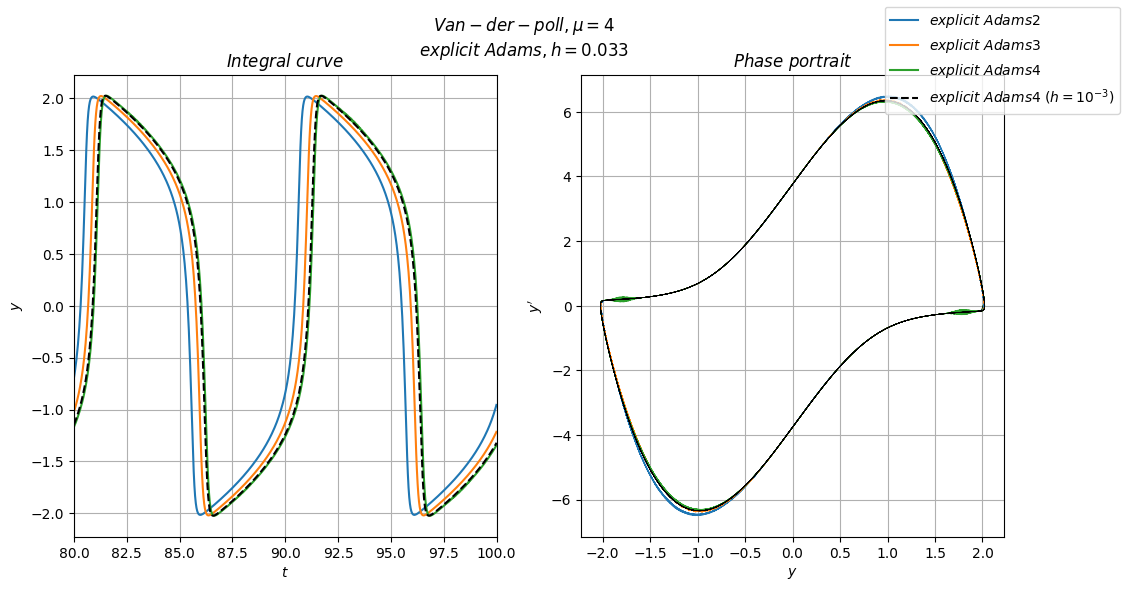

In [7]:
def solution_adams(mu, h):
    solvers = [AdamsCollection.create_e2(h),
               AdamsCollection.create_e3(h),
               AdamsCollection.create_e4(h),
               AdamsCollection.create_e4(1e-3)]

    labels = ["$explicit~ Adams2$", "$explicit~ Adams3$", "$explicit~ Adams4$", "$explicit ~Adams4 ~(h=10^{-3})$"]

    task(mu, h, solvers, labels, "explicit~ Adams")

solution_adams(0, 3e-1)
solution_adams(0.2, 3e-1)
solution_adams(1, 11e-2)
solution_adams(4, 33e-3)

## 3. Явные Формулы Дифференцирования Назад

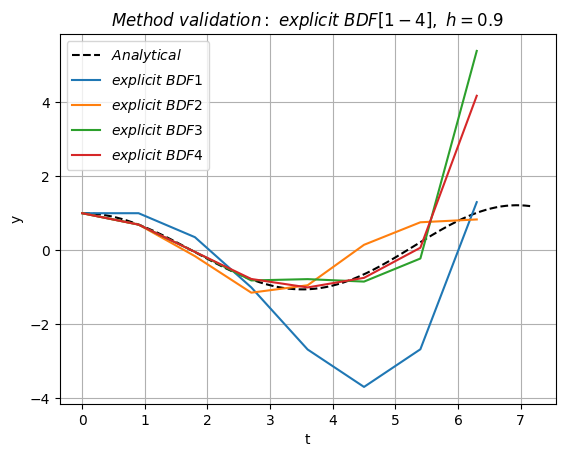

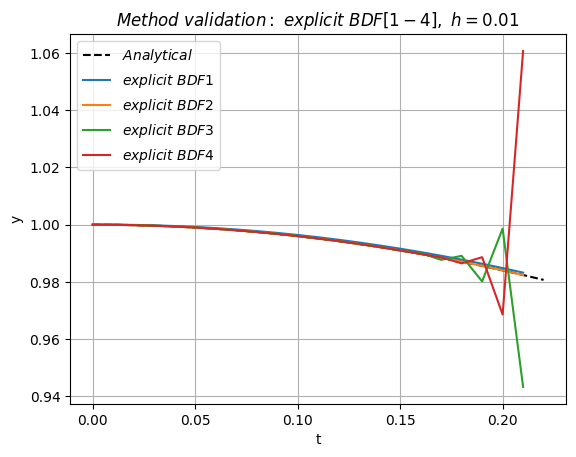

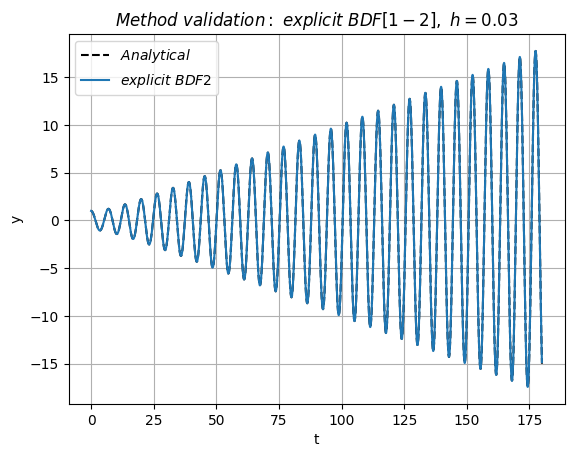

In [8]:
def validate_bdf_1(steps, h):
    solvers = [BDFCollection.create_e1(h),
               BDFCollection.create_e2(h),
               BDFCollection.create_e3(h),
               BDFCollection.create_e4(h)]
    
               
    labels = ["$explicit~ BDF1$", "$explicit~ BDF2$", "$explicit~ BDF3$", "$explicit~ BDF4$"]

    validate(solvers, labels, steps, steps*h, f"explicit~ BDF [1-4],~h={h}")

def validate_bdf_2(steps, h):
    solvers = [BDFCollection.create_e2(h)]
    
               
    labels = ["$explicit~ BDF2$"]

    validate(solvers, labels, steps, steps*h, f"explicit~ BDF [1-2],~h={h}")


validate_bdf_1(8, 9e-1)
validate_bdf_1(22, 1e-2)

validate_bdf_2(6000, 3e-2)

> Явные ФДН схемы с порядком $\ge 3$ неустойчивы (на графике 2 видно), поэтому будем пользоваться только схемой 2 порядка

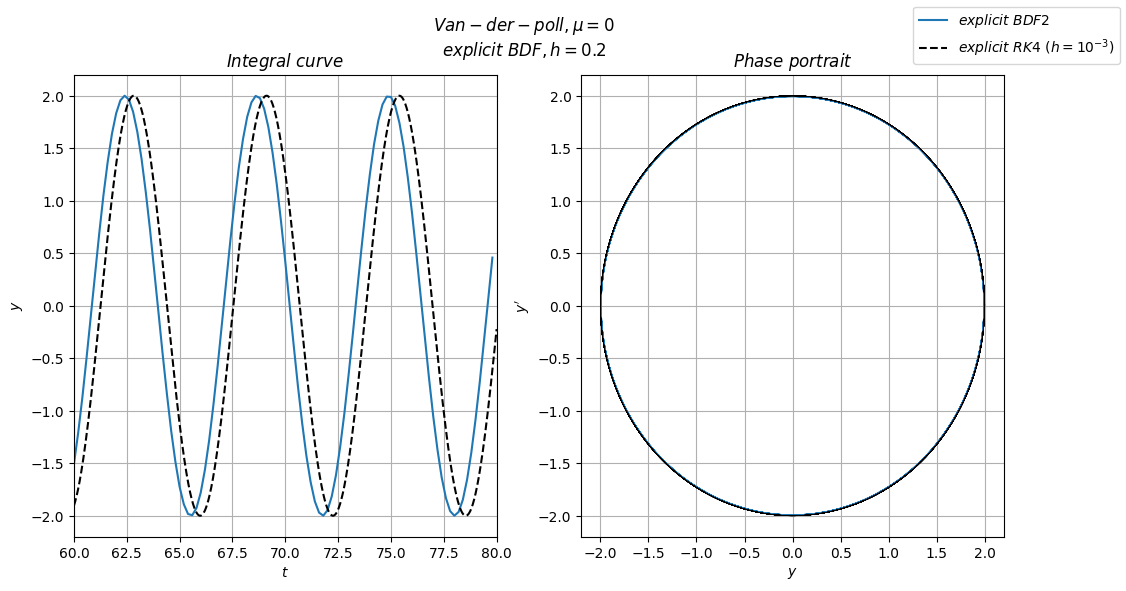

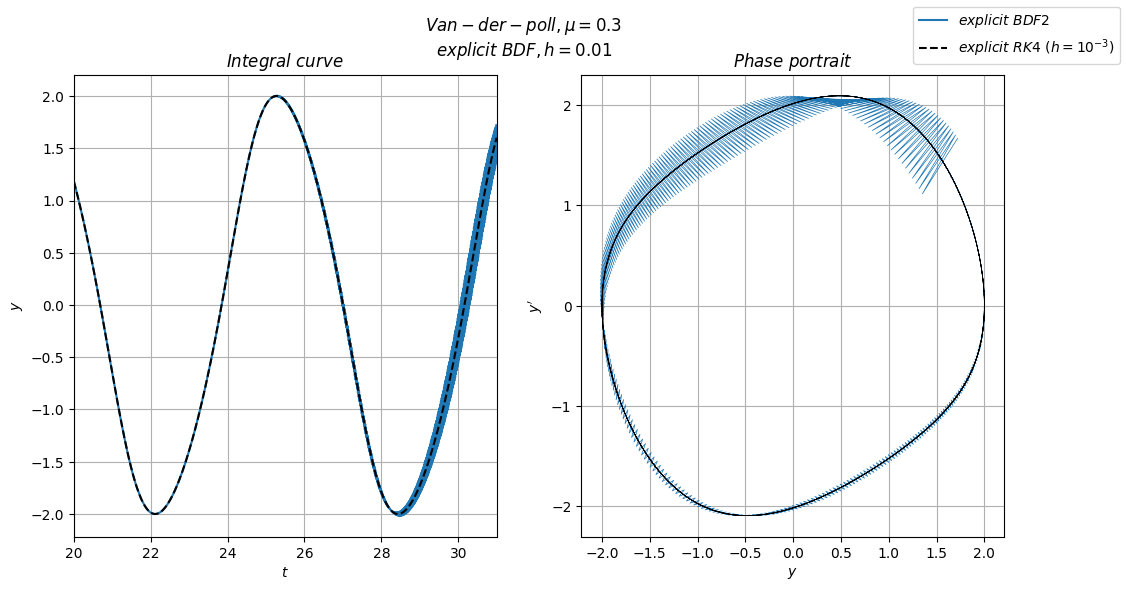

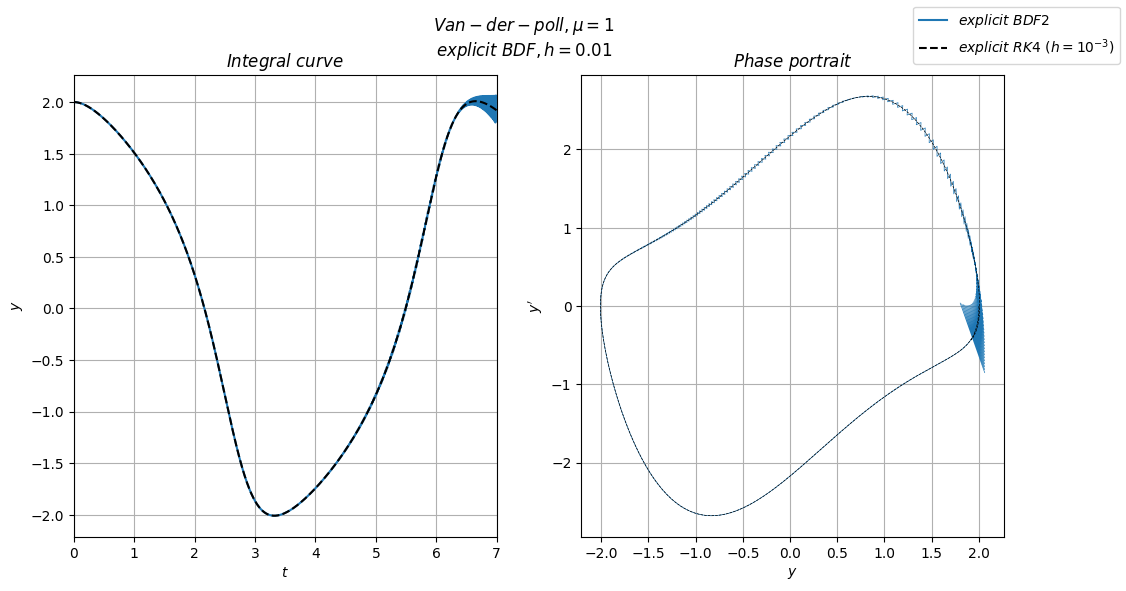

In [9]:
def solution_bdf(mu, h, tbounds=(60, 80)):
    solvers = [BDFCollection.create_e2(h),
               RungeKuttaCollection.create_e4(1e-3)]

    labels = ["$explicit~ BDF2$", "$explicit ~RK4 ~(h=10^{-3})$"]

    return task(mu, h, solvers, labels, "explicit~ BDF", tbounds)

solution_bdf(0, 2e-1)
solution_bdf(0.3, 1e-2, (20, 31))
solution_bdf(1, 1e-2, (0, 7))

> При $\mu > 0$ численное решение начинает осциллировать с неограниченно нарастающей амплитудой. То есть, применительно к данной задаче **ФДН2** выдает неустойчивые решения. <br> *Я трижды все перепроверил, код вроде правильный*